<a href="https://colab.research.google.com/github/cocotey/LearningNotesSKLearn/blob/main/LearningNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
cols = ['Fare', 'Embarked', 'Sex', 'Age']
X = df[cols]

In [5]:
ohe = OneHotEncoder()
imp = SimpleImputer()

In [7]:
#different type of choosing, all is the same
ct = make_column_transformer((ohe,["Embarked","Sex"]))
ct = make_column_transformer((ohe,[1,2]))
ct = make_column_transformer((ohe,slice(1,3)))
ct = make_column_transformer((ohe, [False, True, True, False]))
ct = make_column_transformer((ohe, make_column_selector(pattern="e|s")))
ct = make_column_selector((ohe,make_column_transformer(dtype_include="object")))
ct = make_column_selector((ohe,make_column_transformer(dtype_exclude="number")))

NameError: ignored

In [8]:
ct = make_column_transformer(
    (ohe, ["Embarked","Sex"]),
    (imp,["Age"]),
    remainder="passthrough"
)

ct.fit_transform(X)

array([[ 0.    ,  0.    ,  1.    ,  0.    ,  1.    , 22.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    ,  1.    ,  0.    , 38.    , 71.2833],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    , 26.    ,  7.925 ],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    , 35.    , 53.1   ],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  1.    , 35.    ,  8.05  ],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  1.    , 31.2   ,  8.4583]])

"Fit" = transformer learns something about the data

"transform" = uses what it learned to do the data transformation

Use "fit_transform" on training data, but "transform" (only) on testing/new data to avoid data leakage

In [9]:
X

,Fare,Embarked,Sex,Age
0,7.2500,S,male,22.0
1,71.2833,C,female,38.0
2,7.9250,S,female,26.0
3,53.1000,S,female,35.0
4,8.0500,S,male,35.0
5,8.4583,Q,male,NaN


In [10]:
ohe = OneHotEncoder(sparse=False,handle_unknown="ignore")
ohe.fit_transform(X[["Sex"]])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [11]:
oe = OrdinalEncoder(categories=[["male", "female"], ["C","S","Q"]])
oe.fit_transform(X[["Sex","Embarked"]])

array([[0., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 2.]])

In [12]:
oe = OrdinalEncoder(categories=[["male","female"],["C","S","Q"]])
oe.fit_transform(X[["Sex","Embarked"]])

array([[0., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 2.]])

In [13]:
imputer = SimpleImputer()
clf = LogisticRegression()

In [14]:
pipe = make_pipeline(imputer,clf)

In [15]:
import pandas as pd
import numpy as np
train = pd.DataFrame({'feat1':[10, 20, np.nan, 2], 'feat2':[25., 20, 5, 3], 'label':['A', 'A', 'B', 'B']})
test = pd.DataFrame({'feat1':[30., 5, 15], 'feat2':[12, 10, np.nan]})

In [16]:
train
test


,feat1,feat2
0,30.0,12.0
1,5.0,10.0
2,15.0,NaN


In [17]:
features = ['feat1', 'feat2']

In [18]:
X, y = train[features], train['label']
X_new = test[features]

In [19]:
pipe.fit(X,y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

In [20]:
pipe.predict(X_new)

array(['A', 'B', 'A'], dtype=object)

IterativeImputer = make a regression model, and use other variables as features, and the missing value as target

KNNImputer = find 2 closest row and find their means.

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

In [22]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)

In [23]:
cols = ['SibSp', 'Fare', 'Age']
X = df[cols]

In [24]:
X

,SibSp,Fare,Age
0,1,7.2500,22.0
1,1,71.2833,38.0
2,0,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0
5,0,8.4583,NaN


In [25]:
impute_fit = IterativeImputer()
impute_fit.fit_transform(X)

array([[ 1.        ,  7.25      , 22.        ],
       [ 1.        , 71.2833    , 38.        ],
       [ 0.        ,  7.925     , 26.        ],
       [ 1.        , 53.1       , 35.        ],
       [ 0.        ,  8.05      , 35.        ],
       [ 0.        ,  8.4583    , 28.50639495]])

In [26]:
impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(X)

array([[ 1.    ,  7.25  , 22.    ],
       [ 1.    , 71.2833, 38.    ],
       [ 0.    ,  7.925 , 26.    ],
       [ 1.    , 53.1   , 35.    ],
       [ 0.    ,  8.05  , 35.    ],
       [ 0.    ,  8.4583, 30.5   ]])

In [27]:
ct = make_column_transformer(
  (ohe,["Embarked","Sex"]),
  (clf,["Age"])
)

Use named_steps to view the numbers of the variable

In [28]:
pipe.named_steps.logisticregression.coef_

array([[-0.16111923, -0.42690879]])

How to deal with NaN values
1. Use model that natively handles NaNs 

In [29]:
import pandas as pd
train = pd.read_csv('http://bit.ly/kaggletrain')
test = pd.read_csv('http://bit.ly/kaggletest', nrows=175)

In [30]:
train = train[['Survived', 'Age', 'Fare', 'Pclass']]
test = test[['Age', 'Fare', 'Pclass']]

In [31]:
# count the number of NaNs in each column
train.isna().sum()

Survived      0
Age         177
Fare          0
Pclass        0
dtype: int64

In [32]:
test.isnull().sum()

Age       36
Fare       1
Pclass     0
dtype: int64

In [33]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier



/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [34]:
clf = HistGradientBoostingClassifier()

In [35]:
label = train.pop('Survived')
clf.fit(train, label)
clf.predict(test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer

In [37]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')


In [38]:
cols = ['Sex', 'Name']
X = df[cols]
y = df['Survived']

In [39]:
ohe = OneHotEncoder()
vect = CountVectorizer()
ct = make_column_transformer((ohe,["Sex"]),(vect,"Name"))


In [40]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear', random_state=1)

In [41]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct,clf)

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=5, scoring="accuracy").mean()

0.8024543343167408

GridSearchCV = used to find tuning parameters

In [43]:
# specify parameter values to search
params = {}
params['columntransformer__countvectorizer__min_df'] = [1, 2]
params['logisticregression__C'] = [0.1, 1, 10]
params['logisticregression__penalty'] = ['l1', 'l2']

In [44]:
# try all possible combinations of those parameter values
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X, y);

In [45]:
# what was the best score found during the search?
grid.best_score_

0.8215177954930638

In [46]:
# which combination of parameters produced the best score?
grid.best_params_

{'columntransformer__countvectorizer__min_df': 1,
 'logisticregression__C': 1,
 'logisticregression__penalty': 'l1'}

# Try RandomizedSearchCV if GridSearchCV is too long

Can find the optimum one within low time

Can find continuous value not within stated

In [47]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [48]:
# use single brackets around "Name" because CountVectorizer expects 1-D input
X = df['Name']
y = df['Survived']

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [50]:
pipe = make_pipeline(CountVectorizer(), MultinomialNB())

In [51]:
# cross-validate the pipeline using default parameters
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.8001820350260498

In [52]:
# specify parameter values to search (use a distribution for any continuous parameters)
import scipy as sp
params = {}
params['countvectorizer__min_df'] = [1, 2, 3, 4]
params['countvectorizer__lowercase'] = [True, False]
params['multinomialnb__alpha'] = sp.stats.uniform(scale=1)

In [53]:
# try "n_iter" random combinations of those parameter values
from sklearn.model_selection import RandomizedSearchCV
rand = RandomizedSearchCV(pipe, params, n_iter=10, cv=5, scoring='accuracy', random_state=1)
rand.fit(X, y);

In [54]:
# what was the best score found during the search?
rand.best_score_

0.8080534806352395

In [55]:
# which combination of parameters produced the best score?
rand.best_params_


{'countvectorizer__lowercase': False,
 'countvectorizer__min_df': 3,
 'multinomialnb__alpha': 0.1981014890848788}

In [56]:
# specify parameter values to search
params = {}
params['model__C'] = [0.1, 1, 10]
params['model__penalty'] = ['l1', 'l2']

PLotting confusion matrix

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

cols = ['Pclass', 'Fare']
X = df[cols]
y = df['Survived']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)
clf = LogisticRegression
clf.fit(X_train, y_train)
disp = plot_confusion_matrix(clf, X_test, y_test, cmap="Blues", values_format="d")

TypeError: ignored

In [60]:
clf = LogisticRegression()

In [61]:
clf.fit(X_train, y_train)

LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


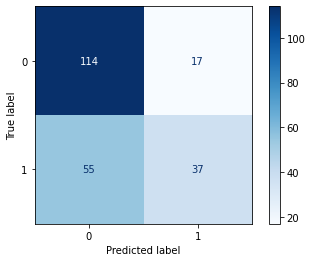

In [62]:
# pass it a trained model: it makes predictions for X_test and compares them to y_test
disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', values_format='d')

# Plot ROC Curves


In [63]:
cols = ['Pclass', 'Fare', 'SibSp']
X = df[cols]
y = df['Survived']

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [66]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [67]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

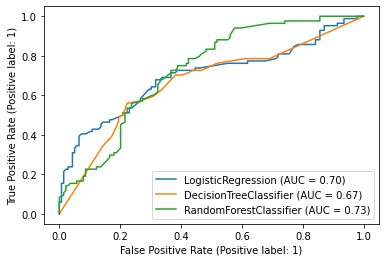

In [68]:
disp = plot_roc_curve(lr, X_test, y_test)
plot_roc_curve(dt, X_test, y_test, ax=disp.ax_);
plot_roc_curve(rf, X_test, y_test, ax=disp.ax_);

# Correct Method for Pipeline
 [link](https://www.youtube.com/watch?v=46ZiVrYeSTg&list=PL5-da3qGB5ID7YYAqireYEew2mWVvgmj6&index=22&ab_channel=DataSchool)

In [69]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [70]:
X, y = dataset.data, dataset.target
features = dataset.feature_names

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y);

In [72]:
model.intercept_

152.1334841628965

In [73]:
model.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [74]:
# display the feature names with the coefficients
list(zip(features, model.coef_))

[('age', -10.012197817470847),
 ('sex', -239.81908936565472),
 ('bmi', 519.8397867901343),
 ('bp', 324.3904276893763),
 ('s1', -792.1841616283061),
 ('s2', 476.74583782366255),
 ('s3', 101.04457032134488),
 ('s4', 177.0641762322512),
 ('s5', 751.2793210873945),
 ('s6', 67.62538639104386)]

# Decision Tree


In [75]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [76]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [77]:
features = ['Pclass', 'Fare', 'Sex']
X = df[features]
y = df['Survived']

In [78]:
classes = ['Deceased', 'Survived']

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2, random_state=0)
dt.fit(X, y);

In [80]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text  # both are new in 0.21

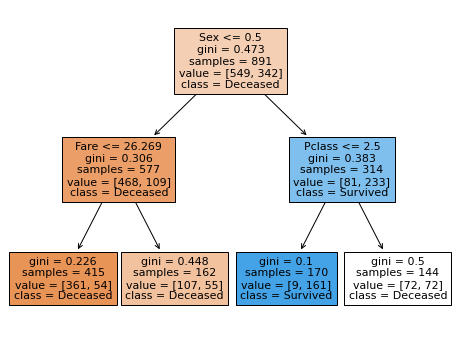

In [81]:
plt.figure(figsize=(8, 6))
plot_tree(dt, feature_names=features, class_names=classes, filled=True);

In [82]:
print(export_text(dt, feature_names=features, show_weights=True))

|--- Sex <= 0.50
|   |--- Fare <= 26.27
|   |   |--- weights: [361.00, 54.00] class: 0
|   |--- Fare >  26.27
|   |   |--- weights: [107.00, 55.00] class: 0
|--- Sex >  0.50
|   |--- Pclass <= 2.50
|   |   |--- weights: [9.00, 161.00] class: 1
|   |--- Pclass >  2.50
|   |   |--- weights: [72.00, 72.00] class: 0



# Prune Decision Tree

In [83]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [84]:
features = ['Pclass', 'Fare', 'Sex', 'Parch']
X = df[features]
y = df['Survived']

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [86]:
# default tree has 331 nodes
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X, y).tree_.node_count

331

In [87]:
cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean()

0.8036281463812692

In [88]:
# pruned tree has 121 nodes
dt = DecisionTreeClassifier(ccp_alpha=0.001, random_state=0)
dt.fit(X, y).tree_.node_count

121

In [89]:
# pruning improved the cross-validated accuracy
cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean()

0.8081162513338773

# Simple Imputer

In [90]:
import pandas as pd
import numpy as np
X = pd.DataFrame({'Shape':['square', 'square', 'oval', 'circle', np.nan]})

In [91]:
X

,Shape
0,square
1,square
2,oval
3,circle
4,NaN


In [92]:
from sklearn.impute import SimpleImputer

In [93]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit_transform(X)

array([['square'],
       ['square'],
       ['oval'],
       ['circle'],
       ['square']], dtype=object)

In [94]:
imputer = SimpleImputer(strategy='constant', fill_value='missing')
imputer.fit_transform(X)

array([['square'],
       ['square'],
       ['oval'],
       ['circle'],
       ['missing']], dtype=object)

# Saving model to pipeline

In [95]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [96]:
cols = ['Embarked', 'Sex']

In [97]:
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=10)
X = df[cols]
y = df['Survived']

In [98]:
df_new = pd.read_csv('http://bit.ly/kaggletest', nrows=10)
X_new = df_new[cols]

In [99]:
ohe = OneHotEncoder()
logreg = LogisticRegression(solver='liblinear', random_state=1)

In [100]:
pipe = make_pipeline(ohe, logreg)

In [101]:
pipe.fit(X, y)
pipe.predict(X_new)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [102]:
# save the pipeline to a file
import joblib
joblib.dump(pipe, 'pipe.joblib')

['pipe.joblib']

In [103]:
# load the pipeline from a file
same_pipe = joblib.load('pipe.joblib')

In [104]:
# use it to make the same predictions
same_pipe.predict(X_new)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [105]:
import joblib
joblib.dump(pipe, 'pipe.joblib')

['pipe.joblib']

# Count Vectorizer
It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text

In [106]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [107]:
X = df[['Name', 'Cabin']].dropna()

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [109]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer((vect, 'Name'), (vect, 'Cabin'))
ct.fit_transform(X)


<204x637 sparse matrix of type '<class 'numpy.longlong'>'
	with 1119 stored elements in Compressed Sparse Row format>

In [110]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

In [111]:
# set up the regression problem
X_reg, y_reg = load_diabetes(return_X_y=True)
reg = LinearRegression()

In [112]:
# set up the classification problem
df = pd.read_csv('http://bit.ly/kaggletrain')
X_clf = df[['Pclass', 'Fare', 'SibSp']]
y_clf = df['Survived']
clf = LogisticRegression()

In [113]:
from sklearn.model_selection import KFold, StratifiedKFold

In [114]:
clf = LogisticRegression()
from sklearn.model_selection import KFold, StratifiedKFold 



Use StratifiedKFold with regression problems:

In [115]:
skf = StratifiedKFold(5, shuffle=True, random_state=1)
cross_val_score(clf, X_clf, y_clf, cv=skf, scoring='accuracy')

array([0.65363128, 0.7247191 , 0.66853933, 0.68539326, 0.65730337])

Use KFold with regression problems:

In [116]:
kf = KFold(5, shuffle=True, random_state=1)
cross_val_score(reg, X_reg, y_reg, cv=kf, scoring='r2')

array([0.43843604, 0.38982527, 0.52792606, 0.47359858, 0.57449343])

# Function Transformer
convert functions to transformers

In [117]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer

In [118]:
X = pd.DataFrame({'Fare':[200, 300, 50, 900],
                  'Code':['X12', 'Y20', 'Z7', np.nan],
                  'Deck':['A101', 'C102', 'A200', 'C300']})

In [119]:
from sklearn.preprocessing import FunctionTransformer

Convert existing function into a transformer:


In [120]:
clip_values = FunctionTransformer(np.clip, kw_args={'a_min':100, 'a_max':600})

Convert custom function into a transformer

In [121]:
# extract the first letter from each string
def first_letter(df):
    return df.apply(lambda x: x.str.slice(0, 1))

In [122]:
get_first_letter = FunctionTransformer(first_letter)

Include them in a ColumnTransformer

In [123]:
ct = make_column_transformer(
    (clip_values, ['Fare']),
    (get_first_letter, ['Code', 'Deck']))

Apply the transformations:

In [124]:
X

,Fare,Code,Deck
0,200,X12,A101
1,300,Y20,C102
2,50,Z7,A200
3,900,NaN,C300


In [125]:
ct.fit_transform(X)

array([[200, 'X', 'A'],
       [300, 'Y', 'C'],
       [100, 'Z', 'A'],
       [600, nan, 'C']], dtype=object)

In [126]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [127]:
df = pd.read_csv('http://bit.ly/kaggletrain')
X = df[['Parch', 'Fare', 'Embarked', 'Sex', 'Name', 'Age']]
y = df['Survived']

In [128]:
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder()

In [129]:
imp_ohe = make_pipeline(imp_constant, ohe)
vect = CountVectorizer()
imp = SimpleImputer()

In [130]:
# pipeline step 1
ct = make_column_transformer(
    (imp_ohe, ['Embarked', 'Sex']),
    (vect, 'Name'),
    (imp, ['Age', 'Fare']),
    ('passthrough', ['Parch']))

In [131]:
# pipeline step 2
selection = SelectPercentile(chi2, percentile=50)

In [132]:
# pipeline step 3
logreg = LogisticRegression(solver='liblinear')

In [133]:
# display estimators as diagrams
from sklearn import set_config
set_config(display='diagram')

In [134]:
pipe = make_pipeline(ct, selection, logreg)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Embarked', 'Sex']),
                                                 ('countvectorizer',
                                                  CountVectorizer(), 'Name'),
                                                 ('simpleimputer',
                                                  SimpleImputer(),
                                                  ['Age', 'Fare']),
                                                 ('passthrough', 'passthrough',
                                                  ['Parch'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=50,
                                  score_func=<function chi2 at 0x7fa526590a70>)),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [135]:
# export the diagram to a file
from sklearn.utils import estimator_html_repr
with open('pipeline.html', 'w') as f:  
    f.write(estimator_html_repr(pipe))

In [136]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

USE n_job=-1, used all the parallel cpus

feature interactions using PolynomialFeatures

In [137]:
import pandas as pd
X = pd.DataFrame({'A':[1, 2, 3], 'B':[4, 4, 4], 'C':[0, 10, 100]})

In [138]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False, interaction_only=True)

In [139]:
X

,A,B,C
0,1,4,0
1,2,4,10
2,3,4,100


In [140]:
# Output columns: A, B, C, A*B, A*C, B*C
poly.fit_transform(X)

array([[  1.,   4.,   0.,   4.,   0.,   0.],
       [  2.,   4.,  10.,   8.,  20.,  40.],
       [  3.,   4., 100.,  12., 300., 400.]])

Ensembleing

general meta approach to machine learning that seeks better predictive performance by combining the predictions from multiple model

In [141]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [142]:
cols = ['Pclass', 'Parch', 'SibSp', 'Fare']
X = df[cols]
y = df['Survived']

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

In [144]:
lr = LogisticRegression(solver='liblinear', random_state=1)
cross_val_score(lr, X, y).mean()

0.6835791852363318

In [145]:
rf = RandomForestClassifier(max_features=None, random_state=1)
cross_val_score(rf, X, y).mean()

0.6947774778733288

In [146]:
# create an ensemble for improved accuracy
vc = VotingClassifier([('clf1', lr), ('clf2', rf)], voting='soft')
cross_val_score(vc, X, y).mean()

0.7251020023852865

In [147]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [148]:
cols = ['Pclass', 'Parch', 'SibSp', 'Fare']
X = df[cols]
y = df['Survived']

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, GridSearchCV

In [150]:
lr = LogisticRegression(solver='liblinear', random_state=1)
rf = RandomForestClassifier(max_features=None, random_state=1)
nb = MultinomialNB()

In [151]:
# create an ensemble of 3 classifiers
vc = VotingClassifier([('clf1', lr), ('clf2', rf), ('clf3', nb)])
cross_val_score(vc, X, y).mean()

0.6970560542338836

In [152]:
# define VotingClassifier parameters to search
params = {'voting':['hard', 'soft'],
          'weights':[(1,1,1), (2,1,1), (1,2,1), (1,1,2)]}

In [155]:
# find the best set of parameters
grid = GridSearchCV(vc, params, n_jobs=-1)
grid.fit(X, y)
grid.best_params_

{'voting': 'soft', 'weights': (1, 2, 1)}

In [154]:
# accuracy has improved
grid.best_score_

0.7262820915196786

Tune Multiple models simultaneously


In [156]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [157]:
cols = ['Sex', 'Name', 'Age']
X = df[cols]
y = df['Survived']

In [158]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [159]:
# this will be the first Pipeline step
ct = ColumnTransformer(
    [('ohe', OneHotEncoder(), ['Sex']),
     ('vectorizer', CountVectorizer(), 'Name'),
     ('imputer', SimpleImputer(), ['Age'])])

In [160]:
# each of these models will take a turn as the second Pipeline step
clf1 = LogisticRegression(solver='liblinear', random_state=1)
clf2 = RandomForestClassifier(random_state=1)

In [161]:
# create the Pipeline
pipe = Pipeline([('preprocessor', ct), ('classifier', clf1)])

In [162]:
# create the parameter dictionary for clf1
params1 = {}
params1['preprocessor__vectorizer__ngram_range'] = [(1, 1), (1, 2)]
params1['classifier__penalty'] = ['l1', 'l2']
params1['classifier__C'] = [0.1, 1, 10]
params1['classifier'] = [clf1]

In [163]:
# create the parameter dictionary for clf2
params2 = {}
params2['preprocessor__vectorizer__ngram_range'] = [(1, 1), (1, 2)]
params2['classifier__n_estimators'] = [100, 200]
params2['classifier__min_samples_leaf'] = [1, 2]
params2['classifier'] = [clf2]

In [164]:
# create a list of parameter dictionaries
params = [params1, params2]

In [165]:
# this will search every parameter combination within each dictionary
grid = GridSearchCV(pipe, params)
grid.fit(X, y)
grid.best_params_

{'classifier': LogisticRegression(C=10, penalty='l1', random_state=1, solver='liblinear'),
 'classifier__C': 10,
 'classifier__penalty': 'l1',
 'preprocessor__vectorizer__ngram_range': (1, 2)}